In [157]:
### 1. Import libraries 

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [158]:
# Configure API Key

quandl.ApiConfig.api_key = 'ECUyPGLoiGsbb6xCoAES'

In [159]:
# Data set choosen =  Producer Price Index by Industry: Confectionery Manufacturing from Cacao Beans: Chocolate and Chocolate-Type Confectionery Products, made from Cacao Beans

data = quandl.get('FRED/PCU3113513113514')

In [160]:
data.head()

,Value
Date,
2011-12-01,100.0
2012-01-01,100.0
2012-02-01,100.0
2012-03-01,100.0
2012-04-01,100.0


In [161]:
data.shape

(121, 1)

In [162]:
data.columns

Index(['Value'], dtype='object')

In [163]:
type(data)

pandas.core.frame.DataFrame

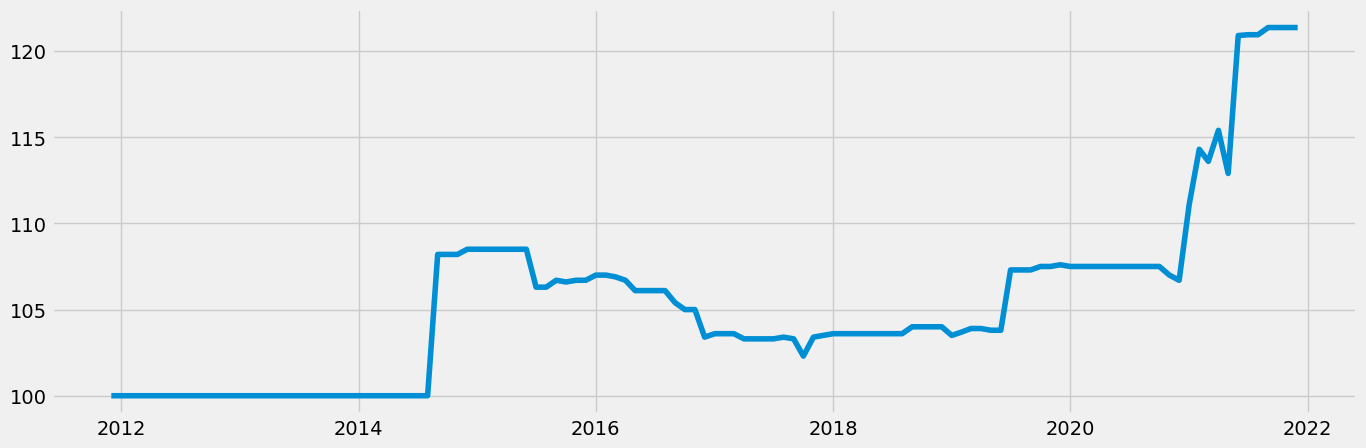

In [166]:
### 2. Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(data)

In [167]:
# Check for missing values

data.isnull().sum()

Value    0
dtype: int64

In [168]:
### 3. Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [169]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

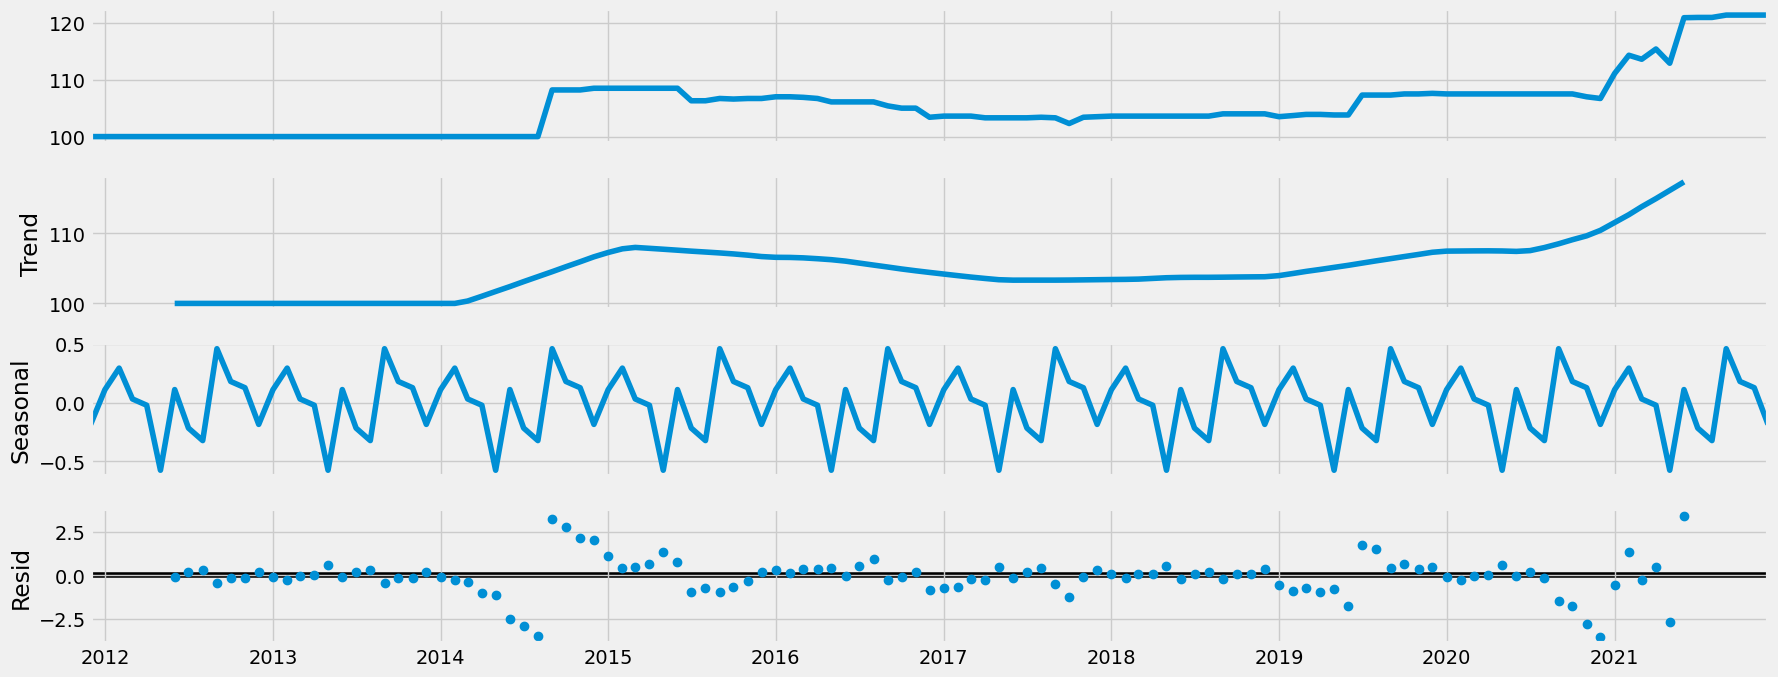

In [170]:
# Plot the separate components

decomposition.plot()
plt.show()


In [ ]:
# We can notice that the prices increased significantly two times throughout the years. The first time happened between 2014 and 2015, and the second time from mid 2019 to 2021.
# There has been a slight and gradual decrease from 2015 until 2019. 


In [171]:
### 4. Conduct a Dickey-Fuller test to check for stationarity


from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): # Define the function,   
    
  # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)

dickey_fuller(data['Value']) 

Dickey-Fuller Stationarity test:
Test Statistic                   0.263294
p-value                          0.975596
Number of Lags Used              0.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
dtype: float64
Test Statistic                   0.263294
p-value                          0.975596
Number of Lags Used              0.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
dtype: float64
Test Statistic                   0.263294
p-value                          0.975596
Number of Lags Used              0.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64


In [ ]:
# The Critical Value (5%) is -2.885943 and is greater (negative) than the test statistic value of 0.263294. It suggests that the data is likely non-stationary and that we can't reject null hypothesis.
# The p - value is 0.975596, indicated that the test result is not significant since it is not less than 0.05.


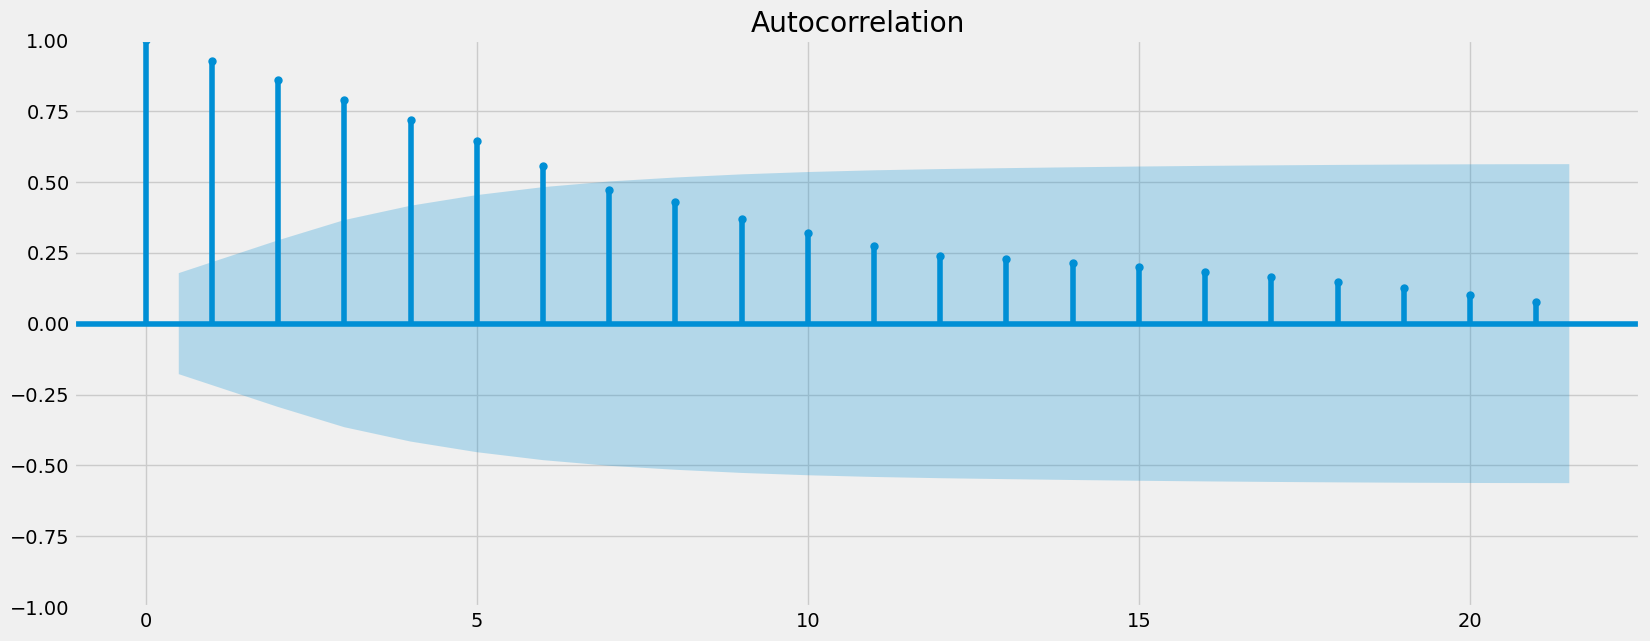

In [180]:
### 5. Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data)
plt.show()

# Based on the charts, we can deduce that the data non-stationary since we can see many lines going above the blue edge of the confidence interval.

In [173]:
### 6. Stationarizing n°1

data_diff = data - data.shift(1)

In [174]:
data_diff.dropna(inplace = True)

In [175]:
data_diff.head()

,Value
Date,
2012-01-01,0.0
2012-02-01,0.0
2012-03-01,0.0
2012-04-01,0.0
2012-05-01,0.0


In [176]:
data_diff.columns

Index(['Value'], dtype='object')

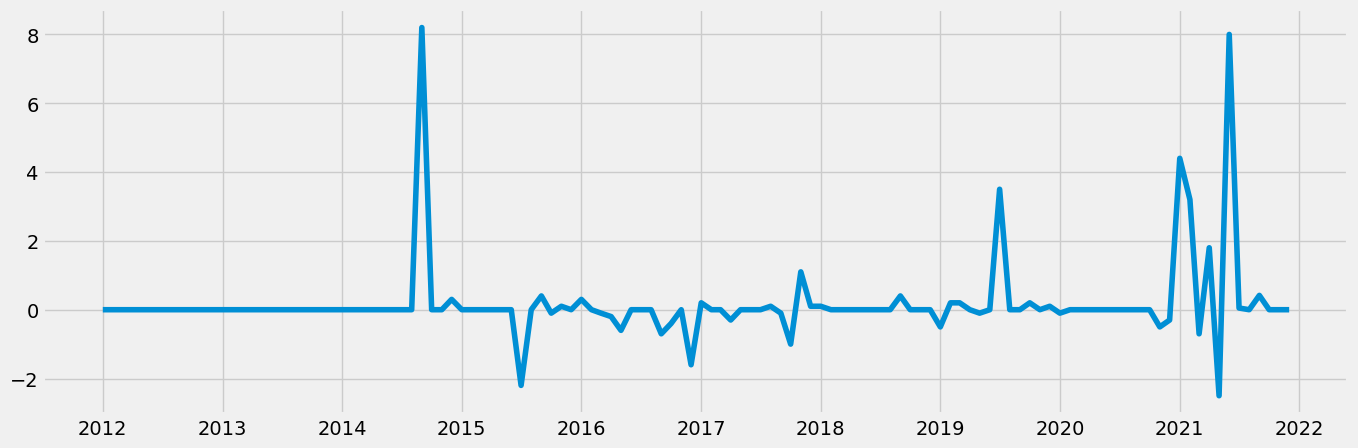

In [177]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [184]:
from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): 
    
  
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)

dickey_fuller(data_diff['Value']) 

Dickey-Fuller Stationarity test:
Test Statistic                -1.197675e+01
p-value                        3.786177e-22
Number of Lags Used            0.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
dtype: float64
Test Statistic                -1.197675e+01
p-value                        3.786177e-22
Number of Lags Used            0.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
dtype: float64
Test Statistic                -1.197675e+01
p-value                        3.786177e-22
Number of Lags Used            0.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64


In [188]:
# Stationarizing n°2

data_diff_2 = data_diff - data_diff.shift(1)

In [189]:
data_diff_2.dropna(inplace = True)

In [190]:
from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): 
    
  
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)

dickey_fuller(data_diff_2['Value']) 

Dickey-Fuller Stationarity test:
Test Statistic                -1.084062e+01
p-value                        1.619464e-19
Number of Lags Used            3.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
dtype: float64
Test Statistic                -1.084062e+01
p-value                        1.619464e-19
Number of Lags Used            3.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
dtype: float64
Test Statistic                -1.084062e+01
p-value                        1.619464e-19
Number of Lags Used            3.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64


In [191]:
# Stationarizing n°3

data_diff_3 = data_diff_2 - data_diff_2.shift(1)

In [193]:
data_diff_3.dropna(inplace = True)

In [194]:
from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): 
    
  
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)


dickey_fuller(data_diff_3['Value']) 

Dickey-Fuller Stationarity test:
Test Statistic                -8.347280e+00
p-value                        3.061221e-13
Number of Lags Used            7.000000e+00
Number of Observations Used    1.100000e+02
Critical Value (1%)           -3.491245e+00
dtype: float64
Test Statistic                -8.347280e+00
p-value                        3.061221e-13
Number of Lags Used            7.000000e+00
Number of Observations Used    1.100000e+02
Critical Value (1%)           -3.491245e+00
Critical Value (5%)           -2.888195e+00
dtype: float64
Test Statistic                -8.347280e+00
p-value                        3.061221e-13
Number of Lags Used            7.000000e+00
Number of Observations Used    1.100000e+02
Critical Value (1%)           -3.491245e+00
Critical Value (5%)           -2.888195e+00
Critical Value (10%)          -2.580988e+00
dtype: float64


In [ ]:
# After three round of differencing, the Test Statistic is smaller (-8.347280e+00) than the Critical Value (-2.888195e+00), which means that we can now consider the data as stationary and reject null hypothesis.


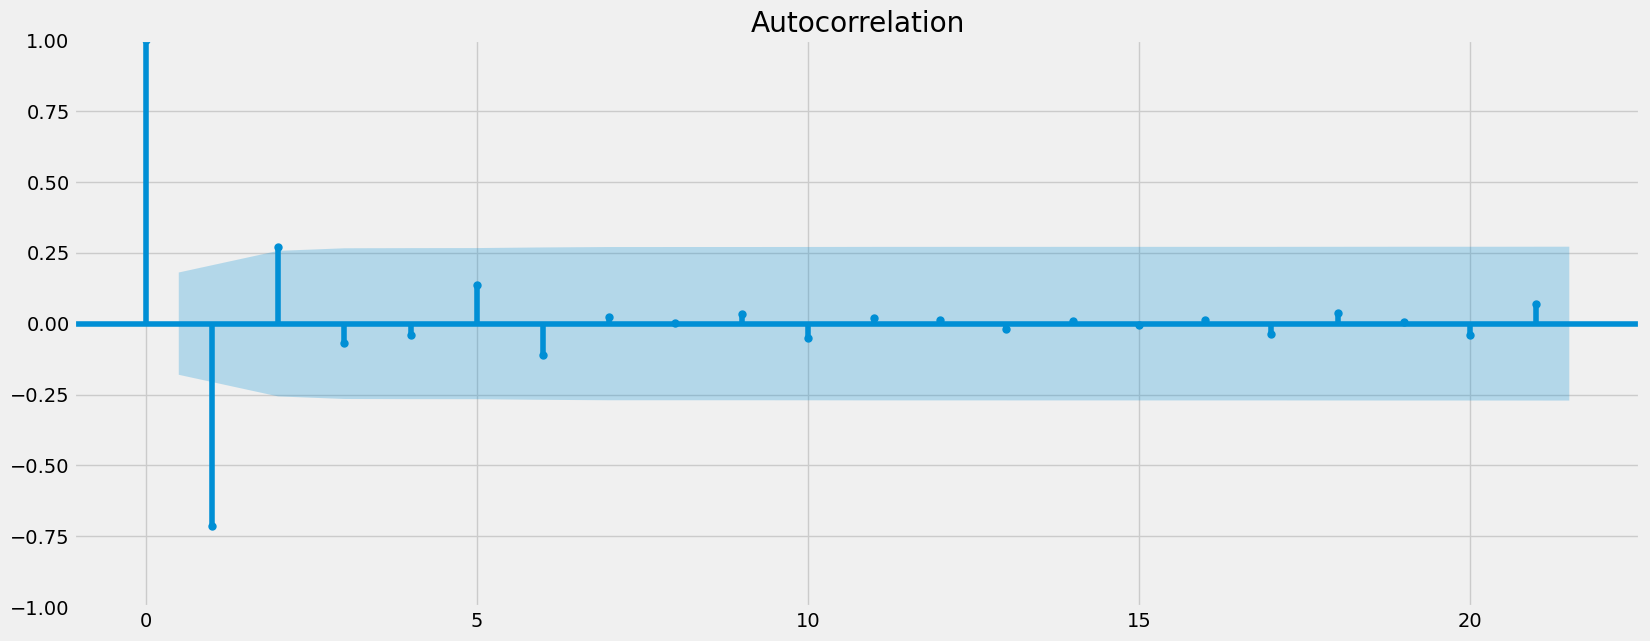

In [195]:
### 7. Check out a plot of autocorrelations

plot_acf(data_diff_3)
plt.show()

In [ ]:
# Based on the chart,the autocorrelation plot has improved since there are fewer autocorrelated terms. However, it’s still not perfect, which means that, despite the Dickey-Fuller test saying that the data is stationary, the stationarity is weak.

